<a href="https://colab.research.google.com/github/amotu/COVIDNet/blob/main/CovidNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install surfboard

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf
from tqdm import tqdm
import sklearn
import surfboard
from surfboard.sound import Waveform
from surfboard.feature_extraction import extract_features

%tensorflow_version 2.x

In [ ]:
drive.flush_and_unmount() 

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/DSCI400')

In [ ]:
from utils import DataGenerator, Modeling, SurfboardFeatures, Parameters, Plotter

In [ ]:
from utils.DataGenerator import DataGenerator, Data_Viz, Get_matrix_inputs
from utils.SurfboardFeatures import GenerateVectors, Reduce_Dim, Get_feature_vectors
from utils.Modeling import build_model2, build_model, build_cnn_train, build_train, get_accuracy
from utils.Plotter import loss_plot, accuracy_plot, roc_plot

In [ ]:
# Set file/audio locations
new_audio_path = '/content/gdrive/MyDrive/DSCI400/Regroup Audio New/coughvid'
coughnet_audio_path = '/content/gdrive/MyDrive/DSCI400/Coughnet Audio'
coswara_audio_path = '/content/gdrive/MyDrive/DSCI400/Regroup Audio New/cough-coswara'

In [ ]:
audio_path = new_audio_path

# Prep for Modeling


## DataGenerator

In [ ]:
# Produces spectrogram images as well as labels for testing, training, and validation sets
x_train, y_train, x_test, y_test, x_val, y_val = Get_matrix_inputs(new_audio_path, coswara_audio_path, audio_path, load=True)

# DataGenerator Viz

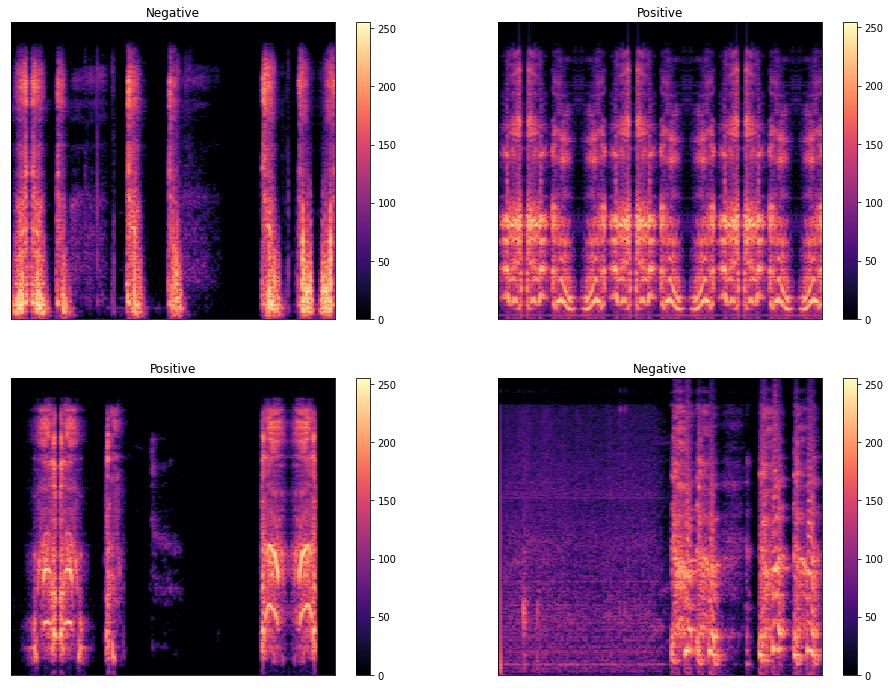

In [ ]:
# Produces image representations of a select number of spectrograms
Data_Viz(2, 2, x_test, y_test)

# GenerateVectors

In [ ]:
# Generates test, train, and validation feature vectors for the model
test_data_vec, train_data_vec, val_data_vec = Get_feature_vectors(new_audio_path, coswara_audio_path, audio_path, load=True)

# Reduce Dim of Vectors

In [ ]:
# Performs dimensionality reduction of the feature vectors
x_test2, x_train2, x_val2 = Reduce_Dim(Parameters.PCA_COMPONENTS, train_data_vec, test_data_vec, val_data_vec)

# Set Batch Size (will hopefully be fixed)

In [ ]:
if audio_path == coswara_audio_path:
  BATCH_SIZE = 167 # I dont like this but else it gives an error
  VAL_BATCH_SIZE = 211
elif audio_path == new_audio_path:
  BATCH_SIZE = 76
  VAL_BATCH_SIZE =  81 # Coughnet - 90

# Get Input Shapes

In [ ]:
input_shape_1 = x_train.shape[1:]
input_shape_1

(512, 215, 1)

In [ ]:
input_shape_2 = x_train2.shape[1:]
input_shape_2

(256,)

# CNN + Sequential

## Build and Train Model

In [ ]:
# Builds a model combining of a Convolutional Neural Network and a Multi-Layer
#   Perceptron to use MFCC data as inputs to differentiate between COVID-19
#   positive and COVID-19 negative audio clips

new_model = build_model2(input_shape_1, input_shape_2, 2, BATCH_SIZE=BATCH_SIZE)

In [ ]:
# Trains CNN + Multi-Layer Perceptron model using input data from MFCCs
model_hist = build_train(new_model,[x_train, x_train2], y_train, BATCH_SIZE, 5, False)

Epoch 1/5
17/17 [==============================] - 37s 144ms/step - loss: 284.3143 - accuracy: 0.5095 - precision_at_recall: 0.4994 - sensitivity_at_specificity: 0.2024
Epoch 2/5
17/17 [==============================] - 2s 145ms/step - loss: 158.8892 - accuracy: 0.5066 - precision_at_recall: 0.4966 - sensitivity_at_specificity: 0.2161
Epoch 3/5
17/17 [==============================] - 2s 145ms/step - loss: 73.1174 - accuracy: 0.5252 - precision_at_recall: 0.5181 - sensitivity_at_specificity: 0.2402
Epoch 4/5
17/17 [==============================] - 2s 145ms/step - loss: 25.3465 - accuracy: 0.5529 - precision_at_recall: 0.5349 - sensitivity_at_specificity: 0.2620
Epoch 5/5
17/17 [==============================] - 2s 143ms/step - loss: 9.7692 - accuracy: 0.5393 - precision_at_recall: 0.5230 - sensitivity_at_specificity: 0.2313


In [ ]:
# Checks the accuracy of the model on the test set of data
predict, MSE, RMSE, accuracy = get_accuracy(new_model, [x_test, x_test2], y_test)

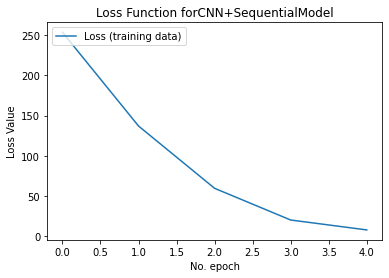

In [ ]:
loss_plot(model_hist, 'CNN+Sequential', False)

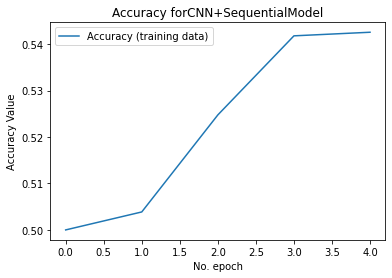

In [ ]:
accuracy_plot(model_hist, 'CNN+Sequential', False)

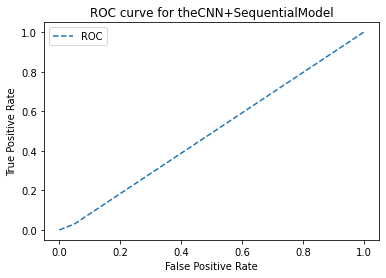

In [ ]:
roc_plot(y_test, predict, 'CNN+Sequential')

# CNN (API)

## Build and Train Model


In [ ]:
# Builds a Convolutional Neural Network (CNN) model 
a = build_model(input_shape_1, 2, BATCH_SIZE=BATCH_SIZE)

In [ ]:
# Trains the CNN model on MFCCs
build_cnn_train(a, x_train, y_train, BATCH_SIZE, 5, VAL_BATCH_SIZE, False, x_val, y_val)

Epoch 1/5
17/17 [==============================] - 5s 216ms/step - loss: 8.2030 - accuracy: 0.5179 - precision_at_recall_2: 0.5028 - sensitivity_at_specificity_2: 0.1221 - val_loss: 5.8070 - val_accuracy: 0.5000 - val_precision_at_recall_2: 0.5057 - val_sensitivity_at_specificity_2: 0.2778
Epoch 2/5
17/17 [==============================] - 3s 159ms/step - loss: 4.8636 - accuracy: 0.4844 - precision_at_recall_2: 0.5229 - sensitivity_at_specificity_2: 0.2252 - val_loss: 3.6834 - val_accuracy: 0.5000 - val_precision_at_recall_2: 0.5048 - val_sensitivity_at_specificity_2: 0.1358
Epoch 3/5
17/17 [==============================] - 3s 159ms/step - loss: 3.5019 - accuracy: 0.5459 - precision_at_recall_2: 0.5192 - sensitivity_at_specificity_2: 0.2689 - val_loss: 2.9874 - val_accuracy: 0.5247 - val_precision_at_recall_2: 0.5130 - val_sensitivity_at_specificity_2: 0.2469
Epoch 4/5
17/17 [==============================] - 3s 159ms/step - loss: 2.8534 - accuracy: 0.4835 - precision_at_recall_2: 0.5

In [ ]:
# Measures accuracy of the CNN model
cnn_predict, cnn_MSE, cnn_RMSE, cnn_accuracy = get_accuracy(a, x_test, y_test)

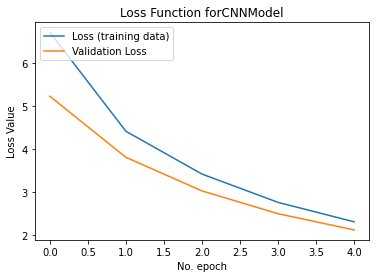

In [ ]:
loss_plot(cnn_hist, 'CNN', True)

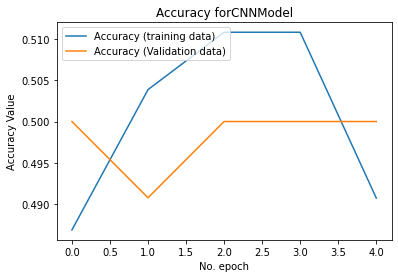

In [ ]:
accuracy_plot(cnn_hist, 'CNN', True)

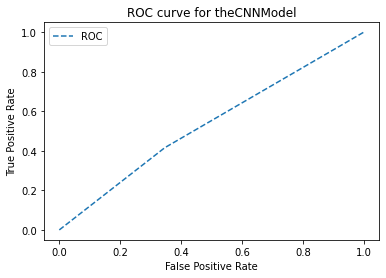

In [ ]:
roc_plot(y_test, cnn_predict, 'CNN')

In [ ]:
# New_Audio:
# Training: 1292
# Testing: 404
# Validation: 324

# CoughNet:
# Training: 720
# Testing: 90
# Validation: 90
# BATCH_SIZE = 72

# Coswara:
# Training: 1670
# Testing: 515
# Validation: 422